<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Task/Task_0724_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0724. Wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과를 출력하세요.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드 및 분할
wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Kernel SVC
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



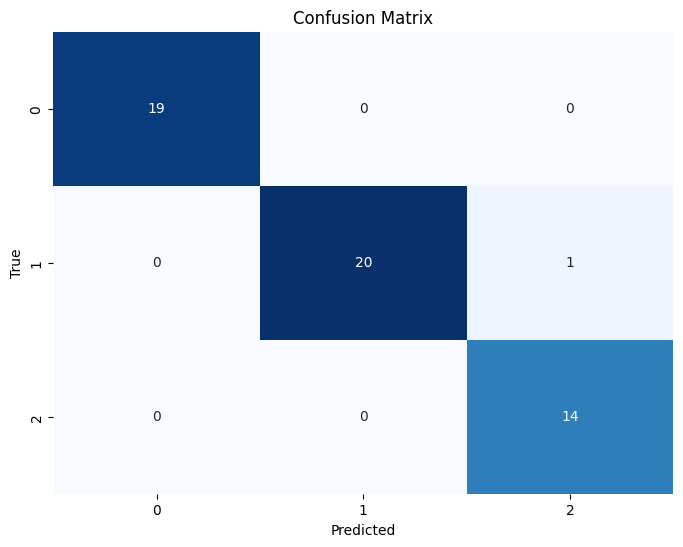

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
linear_svc = SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train, y_train)

# 예측
y_pred_linear = linear_svc.predict(X_test)

# 성능평가
print("Linear Kernel SVC")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Poly Kernel SVC
[[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



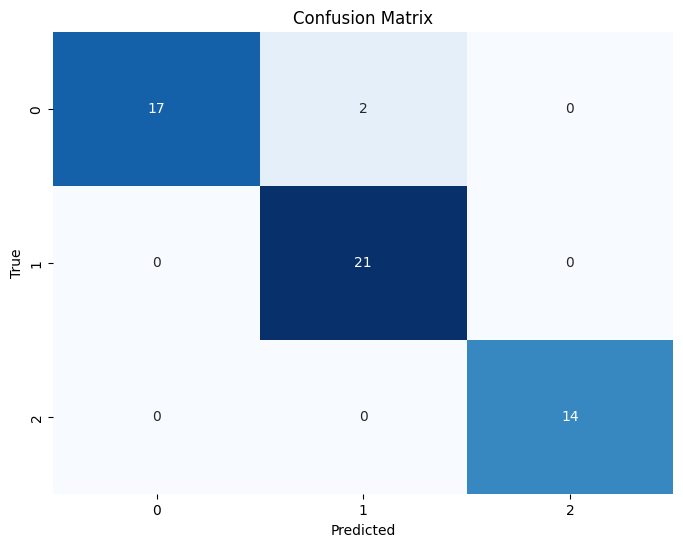

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
poly_svc = SVC(kernel='poly', random_state=42)
poly_svc.fit(X_train, y_train)

y_pred_poly = poly_svc.predict(X_test)

# 결과 출력
print("Polynomial Kernel SVC")
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Rbf Kernel SVC
[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



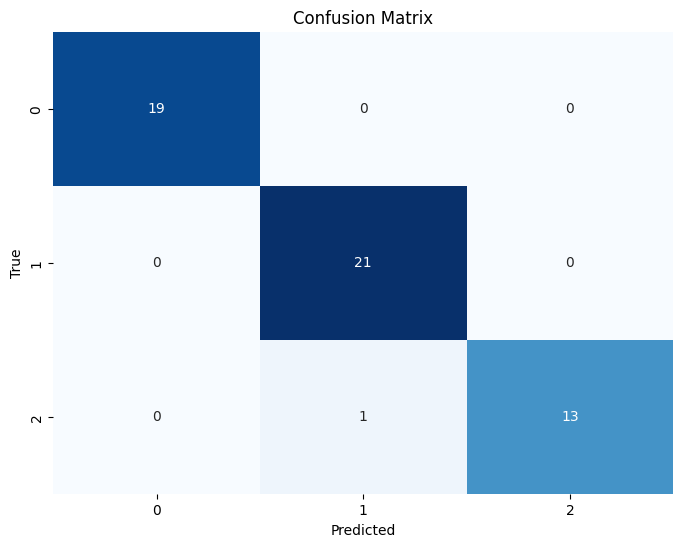

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train, y_train)

y_pred_rbf = rbf_svc.predict(X_test)

# 결과 출력
print("Rbf Kernel SVC")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

실제 평가 결과를 통해 각 커널의 성능을 비교해 보면 다음과 같은 결론을 얻을 수 있습니다:

- Linear Kernel: 데이터가 선형적으로 분리될 수 있는 경우 적합합니다. Wine 데이터셋에서 높은 정확도를 보입니다.
- Polynomial Kernel: 데이터가 다항식 경계를 가질 때 적합합니다. Wine 데이터셋에서는 선형 커널에 비해 다소 낮은 정확도를 보일 수 있습니다.
- RBF Kernel: 데이터가 비선형 경계를 가질 때 적합합니다. Wine 데이터셋에서 매우 높은 정확도를 보입니다.

Wine 데이터셋에서는 Linear Kernel이 가장 적합할 수 있습니다. 이는 데이터가 선형적으로 잘 분리될 수 있기 때문입니다. 그러나 실제로는 각 커널의 성능을 교차 검증을 통해 비교하고, 데이터의 특성에 따라 최적의 커널을 선택합니다.

Task2_0724. breast_cancer dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

n_estimators: 10
Accuracy: 0.96
Confusion Matrix:
[[ 60   3]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



n_estimators: 50
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



n_estimators: 100
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

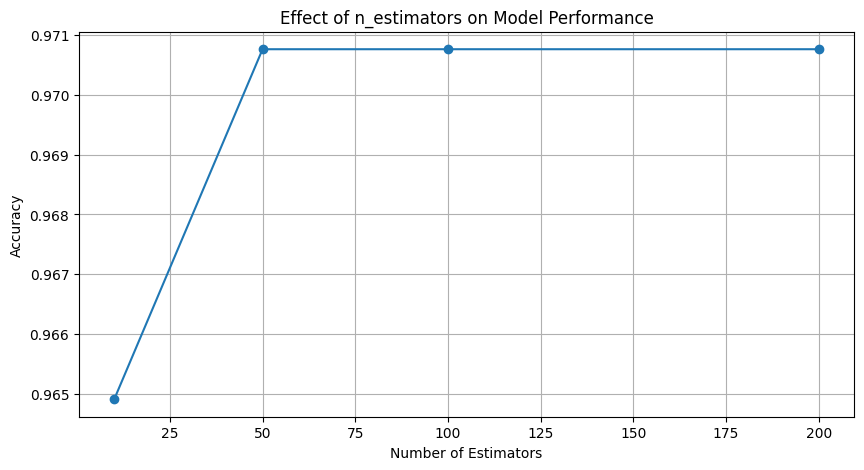

max_depth: 5
Accuracy: 0.96
Confusion Matrix:
[[ 59   4]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



max_depth: 10
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_depth: 20
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

         

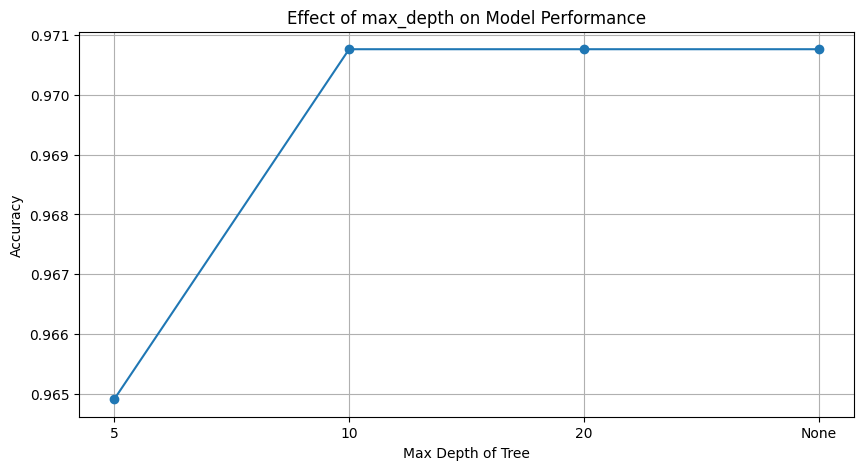

max_features: sqrt
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_features: log2
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171





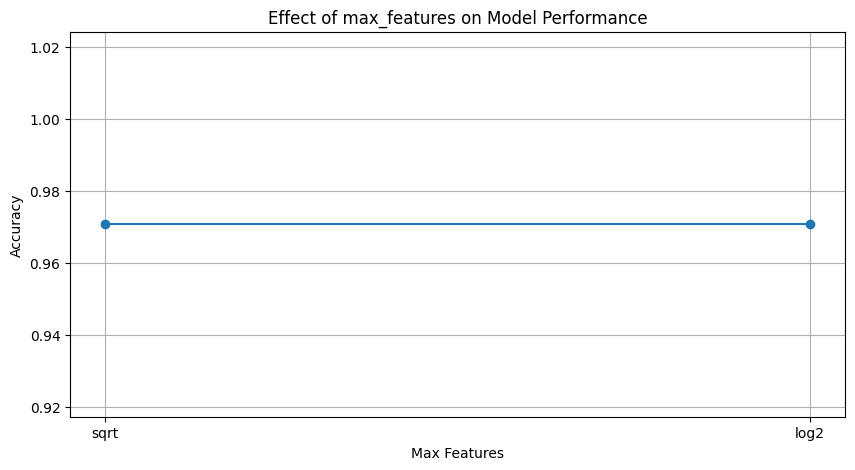

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# 1. n_estimators (트리의 개수)
n_estimators_range = [10, 50, 100, 200]
n_estimators_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    n_estimators_scores.append(score)
    print(f'n_estimators: {n}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# n_estimators 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, n_estimators_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Model Performance')
plt.grid(True)
plt.show()

# 2. max_depth (트리의 최대 깊이)
max_depth_range = [5, 10, 20, None]
max_depth_scores = []

for depth in max_depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_depth_scores.append(score)
    print(f'max_depth: {depth}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_depth 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot([str(d) for d in max_depth_range], max_depth_scores, marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Performance')
plt.grid(True)
plt.show()

# 3. max_features (각 분할에서 고려할 최대 특성 수)
max_features_range = ['sqrt', 'log2']
max_features_scores = []

for feature in max_features_range:
    rf = RandomForestClassifier(max_features=feature, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_features_scores.append(score)
    print(f'max_features: {feature}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_features 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(max_features_range, max_features_scores, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Effect of max_features on Model Performance')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



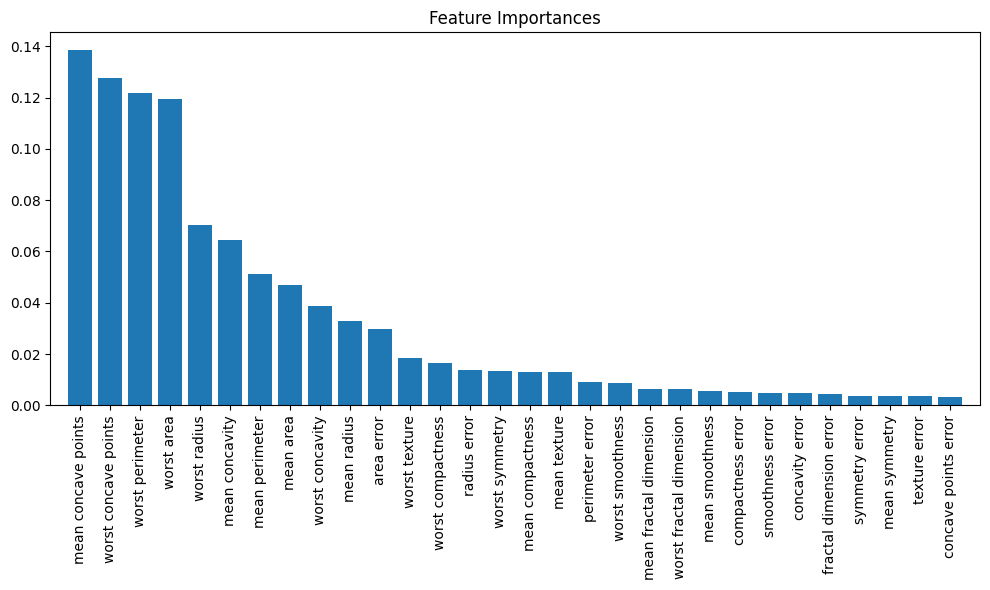

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 모델 생성
rf = RandomForestClassifier(random_state=42)

# GridSerchCV 설정
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,       # 교차 검증 횟수
                           n_jobs=-1,  # 모든 CPU 코어 사용
                           verbose=2)  # 0은 내역을 보여주지 않고, 1은 간단하게, 2는 상세하게 보여줌.

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print(f'Best parameters found: {grid_search.best_params_}')

# 최적의 모델로 예측 수행
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# 중요 변수 시각화
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = cancer.feature_names
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()